# Modern Portfolio Theory

In [1]:
#Import needed libraries
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as optimization

## Setting up stocks and parameters

In [2]:
#Number of trading days
num_trading_days = 252

#number of monte carlo simulations
num_portfolios = 10000

#stocks we are going to handle
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

#historical data - define the start date and the end date
start_date = '2012-01-01'
end_date = '2017-01-01'

### Downloading the data

In [3]:
def download_data():
    #name of the stock(key) - stock values (2010 - 2017) as the values
    stock_data = {}

    #loop through the 2010 - 2017 stock data
    for stock in stocks:
        ticker = yf.Ticker(stock)
        #obtain the closing price of the stock
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
    return pd.DataFrame(stock_data)

In [4]:
#Run the function
df = download_data()

### Get a discription of the data

In [5]:
#Get the statistics of a dataframe
df.describe()

,AAPL,WMT,TSLA,GE,AMZN,DB
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,20.848071,60.010904,10.663082,131.040124,20.300215,30.065856
std,4.959235,5.999952,5.634500,24.412850,9.135636,8.851276
min,12.046194,44.949772,1.519333,85.919998,8.796500,10.808013
25%,16.601857,56.922392,2.793167,113.473824,13.331375,26.001972
50%,21.093836,61.173233,13.142333,132.171989,16.653000,31.138041
75%,25.288355,63.462072,15.025500,145.759655,26.700625,37.390371
max,30.023237,75.786247,19.069332,180.033264,42.217999,46.454514


### Visiualize the data

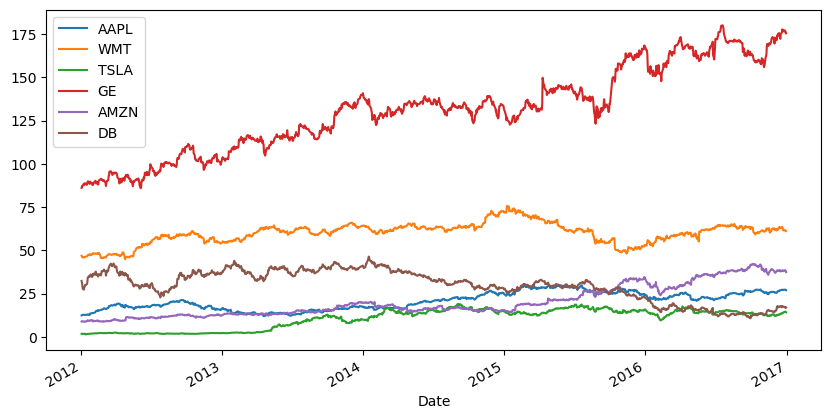

In [6]:
#visualizing the data
def show_data(data):
    #setting the size for the plot
    data.plot(figsize=(10,5))
    plt.show()

show_data(df)

### Calculating the Normalized returns

In [7]:
#NORMALIZATION - Using the logarithmic function to calculate the return
def calculate_return(data):
    #shifts the data one place to the right
    log_return = np.log(data/data.shift(1))
    #returns the logarithmic return after the first record
    return log_return[1:]

returns = calculate_return(df)


### Average Annual Returns & Covariance

In [8]:
#create a annual expected return & volatility
def show_statistics(returns):
    #mean of annual return
    annual_return = returns.mean() * num_trading_days
    #covariate of annual return
    annual_covariance = returns.cov() * num_trading_days
    return annual_return, annual_covariance

show_statistics(returns)

(AAPL    0.154803
 WMT     0.053214
 TSLA    0.406862
 GE      0.142554
 AMZN    0.287153
 DB     -0.128913
 dtype: float64,
           AAPL       WMT      TSLA        GE      AMZN        DB
 AAPL  0.068351  0.008142  0.025434  0.014196  0.019009  0.024571
 WMT   0.008142  0.028017  0.010265  0.009221  0.008545  0.013247
 TSLA  0.025434  0.010265  0.252700  0.019334  0.041774  0.039047
 GE    0.014196  0.009221  0.019334  0.032647  0.018026  0.031347
 AMZN  0.019009  0.008545  0.041774  0.018026  0.094476  0.031574
 DB    0.024571  0.013247  0.039047  0.031347  0.031574  0.139114)

### Expected portfoloio return and risk

In [9]:

def show_mean_variance(returns, weights):
    # Calculate the expected portfolio return by taking the weighted average of the individual asset returns
    # returns.mean() calculates the mean return of each asset
    # weights are the proportions of each asset in the portfolio
    # Multiplying the mean returns by the number of trading days gives the annualized portfolio return
    portfolio_return = np.sum(returns.mean() * weights) * num_trading_days
    
    # Calculate the expected portfolio variance (risk)
    # returns.cov() calculates the covariance matrix of the returns
    # Multiplying the covariance matrix by the number of trading days gives the annualized covariance matrix
    # The dot product of the weights, annualized covariance matrix, and the transpose of the weights gives the portfolio variance
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * num_trading_days, weights)))
    
    # Print the expected annualized portfolio return (mean)
    print("Expected portfolio mean (return) ", portfolio_return)
    
    # Print the expected annualized portfolio variance (risk)
    print("Expected portfolio variance (risk) ", portfolio_variance)


### Monte Carlo Simulation of different weights for portfolio

In [10]:
def generate_portfolios(returns):
    # Initialize lists to store the portfolio weights, means (returns), and risks (variances)
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []

    # Generate 'num_portfolios' random portfolios
    for _ in range(num_portfolios):
        # Generate random weights for each asset in the portfolio
        # The weights represent the proportion of each asset in the portfolio
        w = np.random.random(len(stocks))
        
        # Normalize the weights so that they sum to 1
        w /= np.sum(w)
        
        # Add the generated weights to the list of portfolio weights
        portfolio_weights.append(w)
        
        # Calculate the portfolio mean (return) using the generated weights and asset returns
        # Multiplying by the number of trading days gives the annualized portfolio return
        portfolio_means.append(np.sum(returns.mean() * w) * num_trading_days)
        
        # Calculate the portfolio risk (variance) using the generated weights and asset returns covariance matrix
        # Multiplying the covariance matrix by the number of trading days gives the annualized covariance matrix
        # The dot product of the weights, annualized covariance matrix, and the transpose of the weights gives the portfolio variance
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * num_trading_days, w))))
    
    # Convert the lists of portfolio weights, means (returns), and risks (variances) to NumPy arrays
    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)
    

In [11]:
pweights, means, risks = generate_portfolios(returns)

### Visualization of the MC Simulation

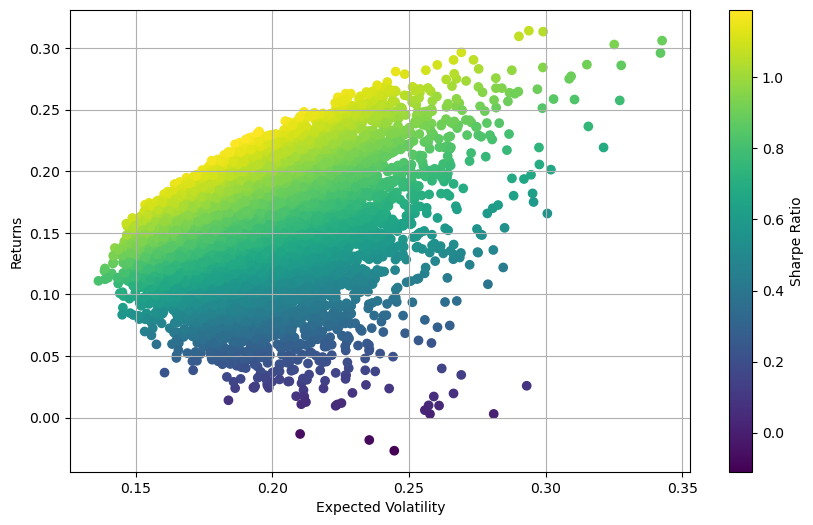

In [12]:
def show_portfolios(returns, volatilities):
    # Create a new figure with a specified size (10 x 6 inches)
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot of the portfolio volatilities (x-axis) and returns (y-axis)
    # Color the points based on their Sharpe Ratio (return-to-risk ratio)
    plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
    
    # Add grid lines to the plot for better readability
    plt.grid(True)
    
    # Set the label for the x-axis
    plt.xlabel('Expected Volatility')
    
    # Set the label for the y-axis
    plt.ylabel('Returns')
    
    # Add a colorbar to the plot, indicating the Sharpe Ratio
    plt.colorbar(label='Sharpe Ratio')
    
    # Display the plot
    plt.show()

# Call the show_portfolios function with the generated portfolio means (returns) and risks (volatilities)
show_portfolios(means, risks)

In [13]:
# Function to compute portfolio statistics: return, volatility, and Sharpe ratio
def statistics(weights, returns):
    # Calculate the annualized portfolio return
    portfolio_return = np.sum(returns.mean() * weights) * num_trading_days
    # Calculate the annualized portfolio volatility (standard deviation)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * num_trading_days, weights)))
    # Calculate the Sharpe ratio of the portfolio
    sharpe_ratio = portfolio_return / portfolio_volatility
    return np.array([portfolio_return, portfolio_volatility, sharpe_ratio])

# Function to minimize in order to maximize the Sharpe ratio
def min_function_sharpe(weights, returns):
    # Return the negative Sharpe ratio, since we want to maximize it (minimize its negative)
    return -statistics(weights, returns)[2]

# Function to optimize the portfolio's weights
def optimize_portfolio(weights, returns):
    # Constraint: the sum of the weights should be equal to 1
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    # Bounds: the weight of each asset must be between 0 and 1
    bounds = tuple((0, 1) for _ in range(len(stocks)))
    # Optimize the portfolio using the Sequential Least Squares Programming (SLSQP) algorithm
    return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns, method='SLSQP', constraints=constraints, bounds=bounds)

# Function to print the optimal portfolio's weights and performance
def print_optimal_portfolio(optimum, returns):
    print("Optimal portfolio: ", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio: ",statistics(optimum['x'].round(3), returns))

# Function to display the optimal portfolio on a return-volatility scatter plot
def show_optimal_portfolio(opt, returns, portfolio_returns, portfolio_volatility):
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_volatility, portfolio_returns, c=portfolio_returns / portfolio_volatility, marker='o')
    plt.grid(True)
    plt.xlabel('Portfolio Volatility')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label='Sharpe Ratio')
    # Plot the optimal portfolio as a green star on the scatter plot
    plt.plot(statistics(opt['x'], returns)[1], statistics(opt['x'], returns)[0], 'g*', markersize=20.0)
    plt.show()


In [14]:
# Call the function 'optimize_portfolio' with the arguments 'pweights' and 'returns' to find the optimal portfolio
optium = optimize_portfolio(pweights, returns)

# Call the function 'print_optimal_portfolio' with the arguments 'optium' and 'returns' and print the result
print(print_optimal_portfolio(optium, returns))

Optimal portfolio:  [0.139 0.    0.166 0.373 0.322 0.   ]
Expected return, volatility and Sharpe ratio:  [0.2346927  0.19534453 1.20142957]
None


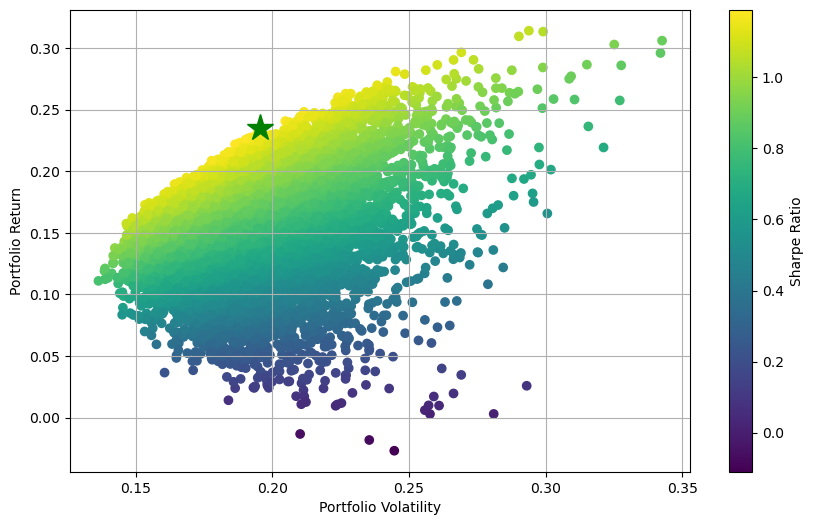

In [15]:
show_optimal_portfolio(optium, returns, means, risks)